# Alzheimer's Disease Classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("D:\\DATA_SCIENCE\\Python\\Project01\\alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [8]:
df.shape

(2149, 35)

In [10]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [12]:
df.duplicated().sum()

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [16]:
df.drop(columns = 'DoctorInCharge', inplace = True)
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1


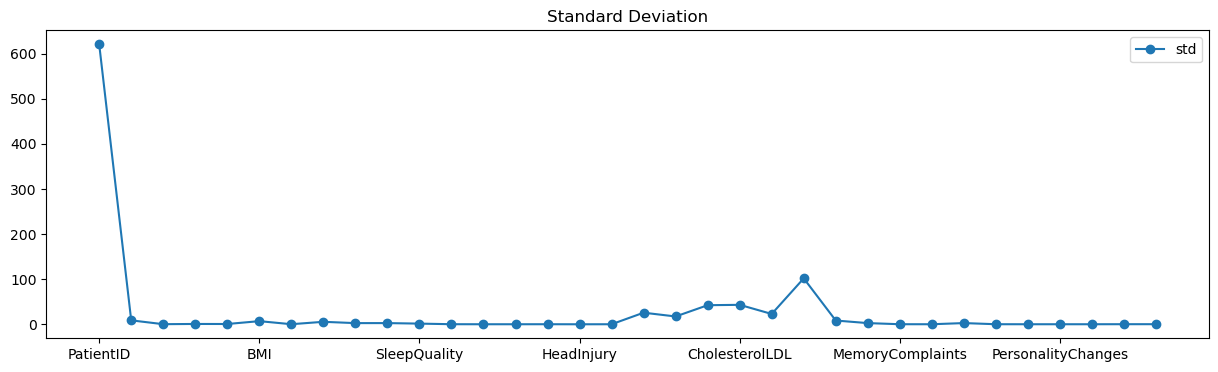

In [18]:
df.describe().T.plot(kind = 'line', y = 'std', marker = 'o', linestyle = "-", figsize = (15,4))
plt.title("Standard Deviation");

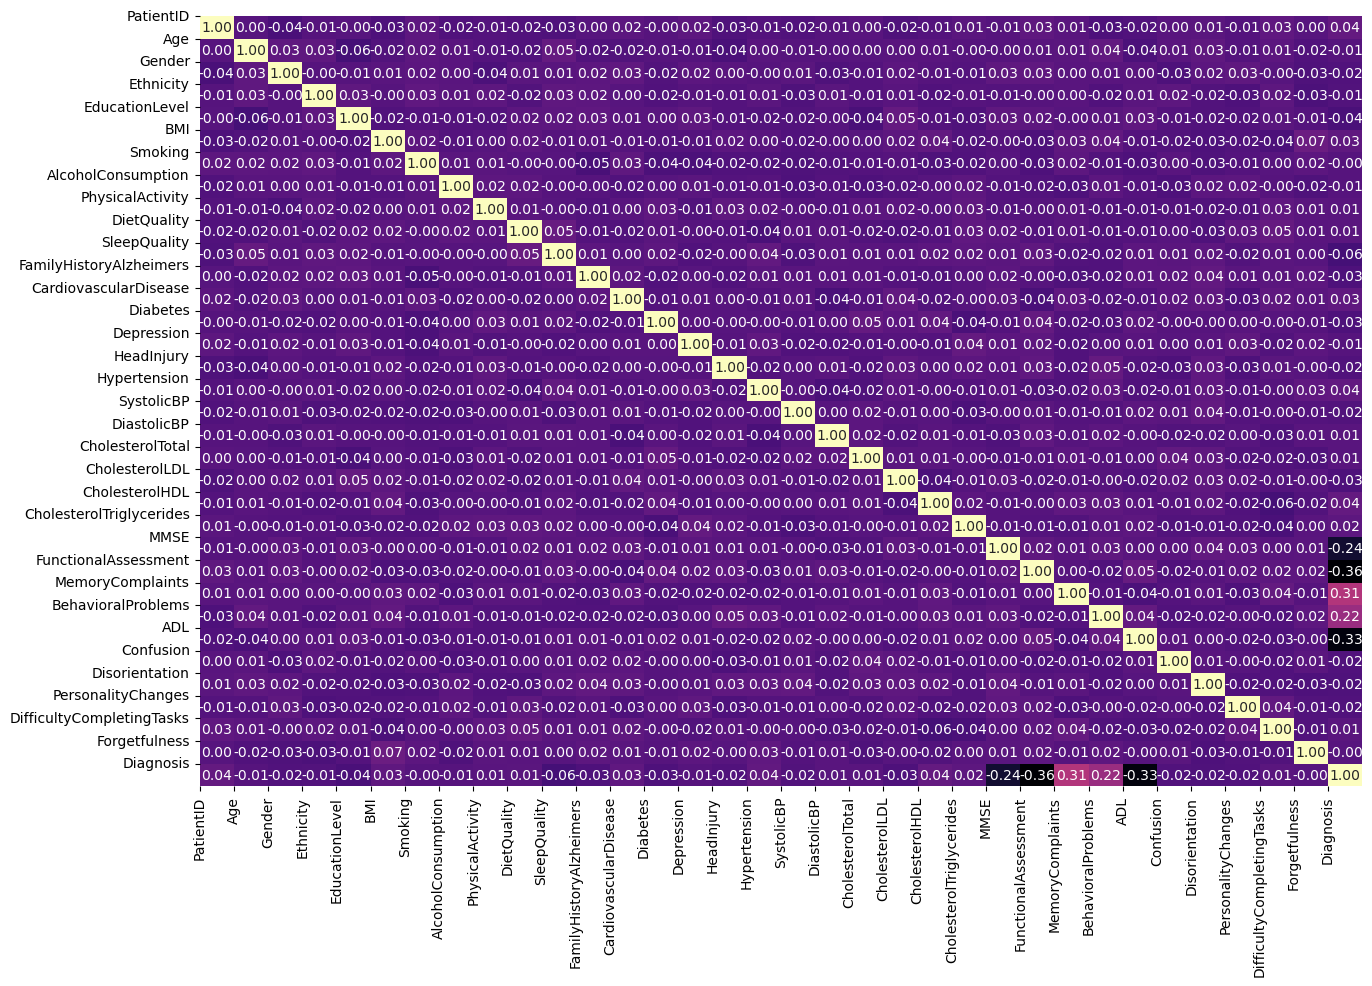

In [20]:
correlation_df = df.corr(numeric_only='number')
fix, ax = plt.subplots(figsize=(15,10))

sns.heatmap(correlation_df,annot=True,linecolor='blue',cmap='magma',fmt = '.2f', cbar=False)

plt.xticks(range(len(correlation_df.columns)), correlation_df.columns);

plt.yticks(range(len(correlation_df.columns)), correlation_df.columns);

In [22]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [24]:
categorical_columns = ['Gender','Ethnicity','Diagnosis','DoctorInCharge']
categorical_columns

['Gender', 'Ethnicity', 'Diagnosis', 'DoctorInCharge']

In [26]:
numerical_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity','SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE']
numerical_columns

['Age',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE']

In [28]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [30]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_columns] < (Q1 - 1.5*IQR)) | (df[numeric_columns] > (Q3 + 1.5*IQR)))
outliers_count = outliers.sum()
print(f'Outliers counts: {outliers_count}')

Outliers counts: PatientID                      0
Age                            0
Gender                         0
Ethnicity                    211
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease        310
Diabetes                     324
Depression                   431
HeadInjury                   199
Hypertension                 320
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
MMSE                           0
FunctionalAssessment           0
MemoryComplaints             447
BehavioralProblems           337
ADL                            0
Confusion                    441
Disorientation            

In [32]:
numerical_columns

['Age',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE']

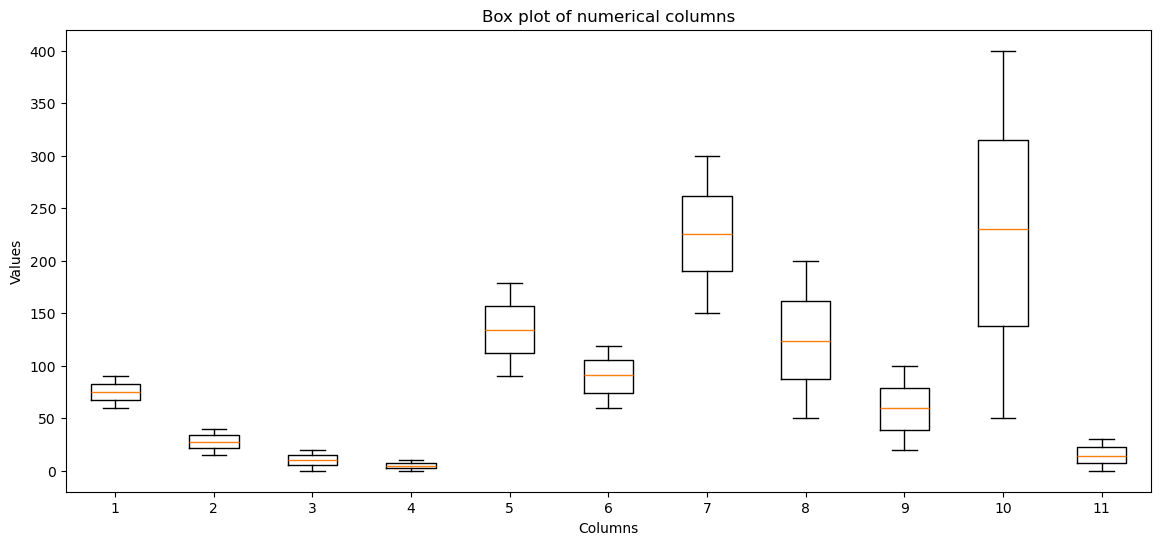

In [34]:
plt.figure(figsize=(14, 6))
plt.boxplot(df[numerical_columns])
plt.title("Box plot of numerical columns")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# EDA

In [37]:
df['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

(array([212., 192., 234., 217., 203., 217., 197., 196., 178., 303.]),
 array([60., 63., 66., 69., 72., 75., 78., 81., 84., 87., 90.]),
 <BarContainer object of 10 artists>)

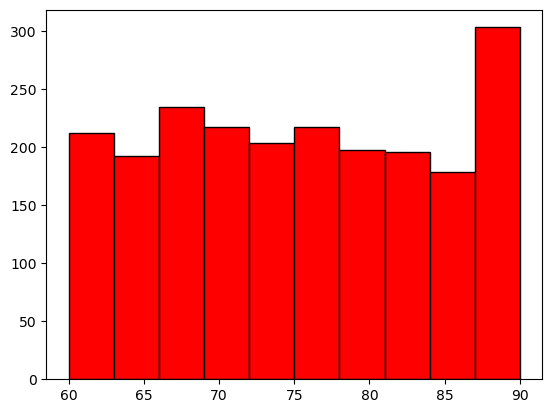

In [39]:
plt.hist(df['Age'], bins = 10, color='red', edgecolor = 'black') #majority of data lies in 87 - 90 age

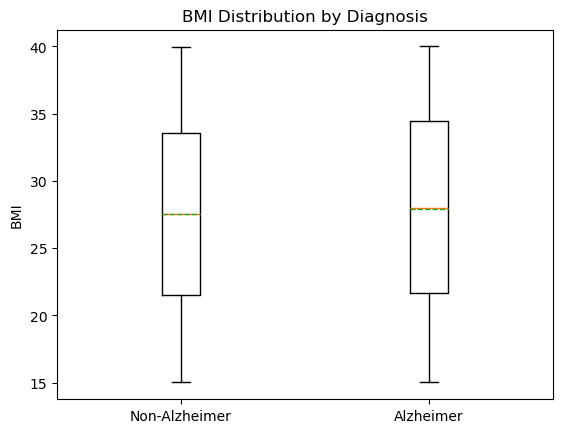

In [41]:
plt.boxplot([df[df['Diagnosis'] == 0]['BMI'], df[df['Diagnosis'] == 1]['BMI']],showmeans=True, meanline= True,labels= ['Non-Alzheimer', 'Alzheimer'])
plt.title('BMI Distribution by Diagnosis')
plt.ylabel('BMI');

In [43]:
#both groups have similar medians around 30, with equal variability, suggesting no significant BMI differences.

In [45]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [47]:
df['Depression'].value_counts()

Depression
0    1718
1     431
Name: count, dtype: int64

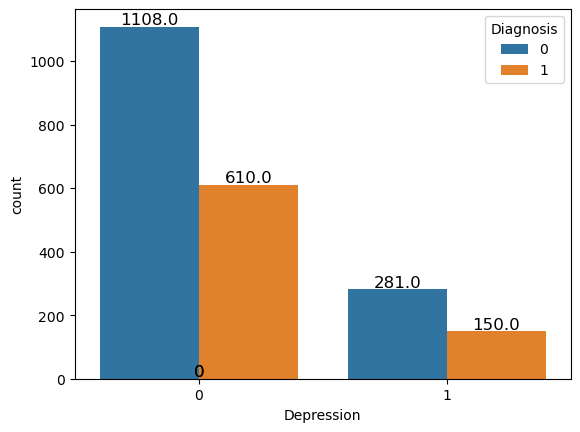

In [49]:
ab = sns.countplot(df, x = 'Depression', hue = 'Diagnosis')

for a in ab.patches:
    ab.annotate(f'{a.get_height()}',
                (a.get_x() + a.get_width() / 2., a.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [51]:
df['Diagnosis'].groupby(df['FamilyHistoryAlzheimers']).sum()

FamilyHistoryAlzheimers
0    583
1    177
Name: Diagnosis, dtype: int64

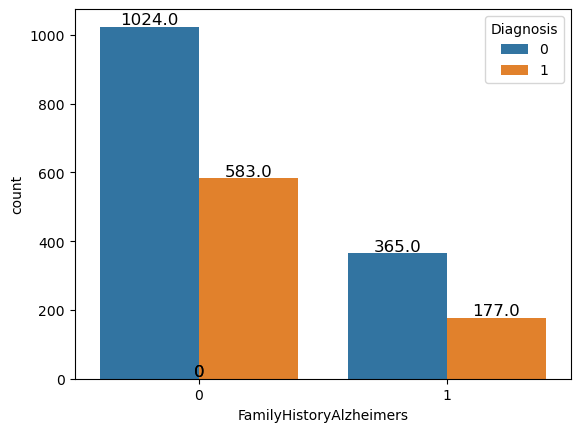

In [53]:
af = sns.countplot(df, x = 'FamilyHistoryAlzheimers', hue = 'Diagnosis')

for a in af.patches:
    af.annotate(f'{a.get_height()}',
                (a.get_x() + a.get_width() / 2., a.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: xlabel='SystolicBP', ylabel='Count'>

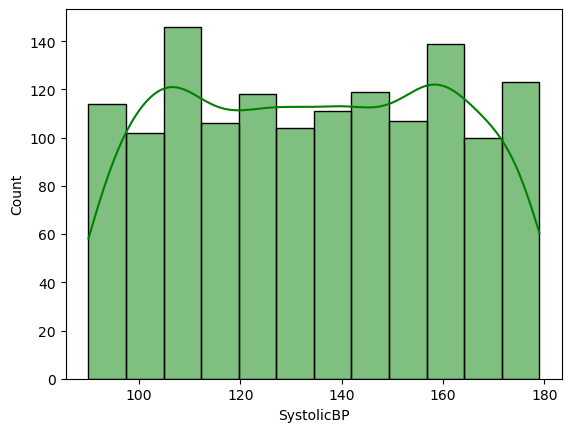

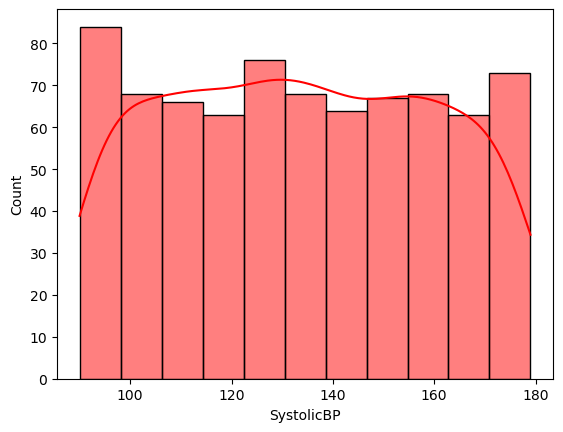

In [55]:
plt.subplots(1,1)
sns.histplot(df[df['Diagnosis'] == 0]['SystolicBP'], kde =True, color = 'green', label = 'Non-Alzheime') #there is no peak in any specific
plt.subplots(1,1)
sns.histplot(df[df['Diagnosis'] == 1]['SystolicBP'], kde =True, color = 'red', label = 'Alzheime') #high then the non - alzheimer

In [57]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

<BarContainer object of 2 artists>

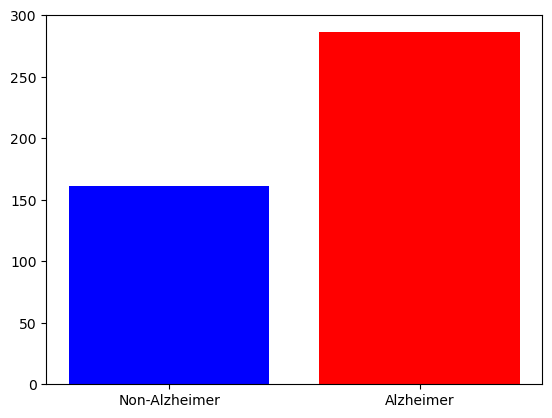

In [59]:
memory_complaints_counts = df.groupby('Diagnosis')['MemoryComplaints'].sum()
plt.bar(['Non-Alzheimer', 'Alzheimer'], memory_complaints_counts, color=['blue', 'red'])
#Memory complaints - alzhemier patients have more complaints then alzhemier. this make key impact

In [61]:
education_report = df.groupby(['EducationLevel', 'Diagnosis']).size().reset_index(name='Count')
education_report

,EducationLevel,Diagnosis,Count
0,0,0,272
1,0,1,174
2,1,0,552
3,1,1,302
4,2,0,419
5,2,1,217
6,3,0,146
7,3,1,67


In [63]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

<Axes: xlabel='FunctionalAssessment', ylabel='Count'>

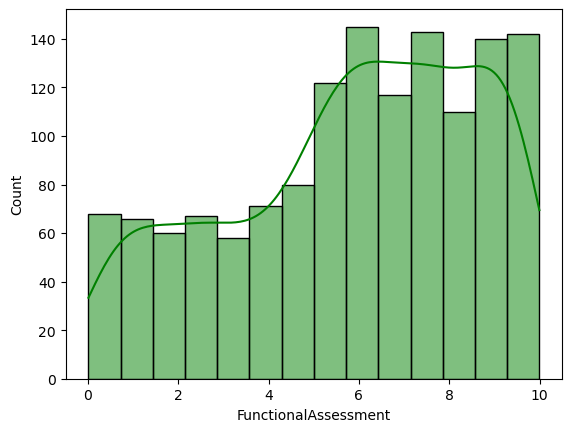

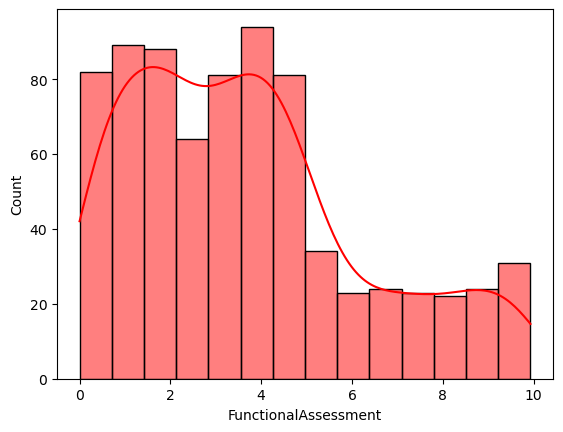

In [65]:
plt.subplots(1,1)
sns.histplot(df[df['Diagnosis'] == 0]['FunctionalAssessment'], kde =True, color = 'green', label = 'Non-Alzheime') #there is no peak in any specific
plt.subplots(1,1)
sns.histplot(df[df['Diagnosis'] == 1]['FunctionalAssessment'], kde =True, color = 'red', label = 'Alzheime') #high then the non - alzheimer

In [67]:
df.groupby('Diagnosis')['BehavioralProblems'].sum()

Diagnosis
0    134
1    203
Name: BehavioralProblems, dtype: int64

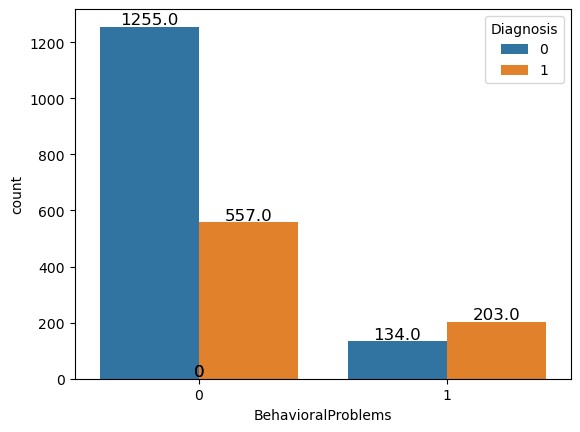

In [69]:
af = sns.countplot(df, x = 'BehavioralProblems', hue = 'Diagnosis')

for a in af.patches:
    af.annotate(f'{a.get_height()}',
                (a.get_x() + a.get_width() / 2., a.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

#When BehavioralProblems is capture there is more chances of having alzheimers

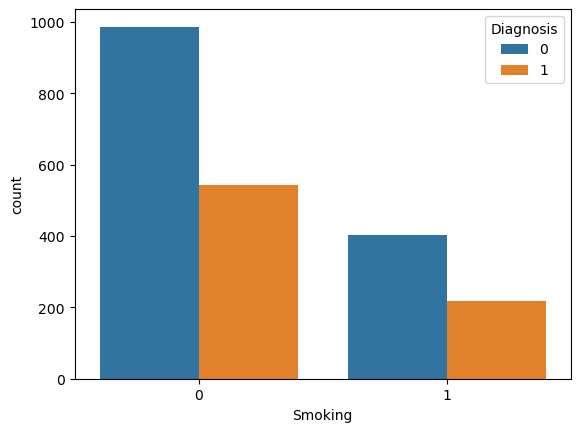

In [71]:
sns.countplot(df, x = 'Smoking', hue = 'Diagnosis');

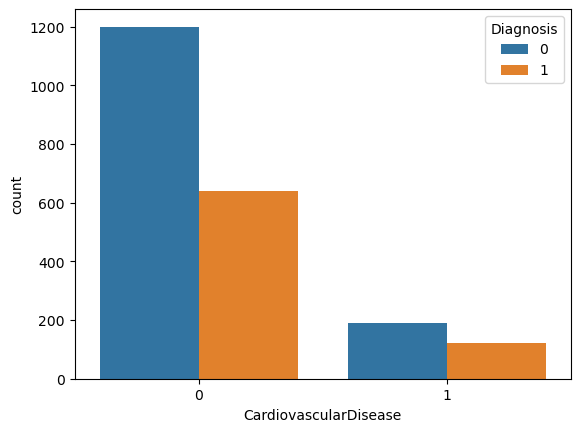

In [73]:
sns.countplot(df, x = 'CardiovascularDisease', hue = 'Diagnosis');

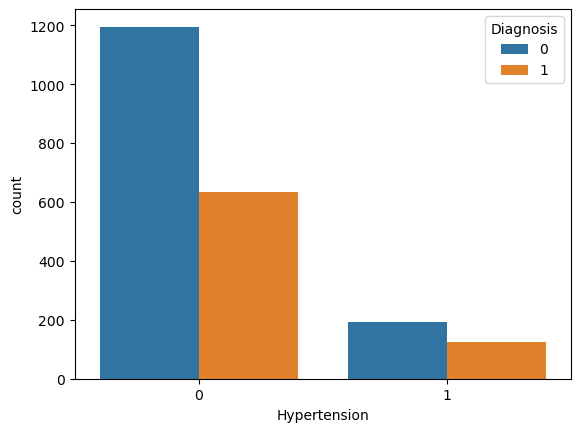

In [75]:
sns.countplot(df, x = 'Hypertension', hue = 'Diagnosis'); #can see if hypertension is capture then there can be chance of having alzheimer as compare to no hypertension

In [77]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [79]:
df['ADL']

0       1.725883
1       2.592424
2       7.119548
3       6.481226
4       0.014691
          ...   
2144    4.492838
2145    9.204952
2146    5.036334
2147    3.785399
2148    8.327563
Name: ADL, Length: 2149, dtype: float64

<Axes: xlabel='CholesterolTriglycerides', ylabel='CholesterolHDL'>

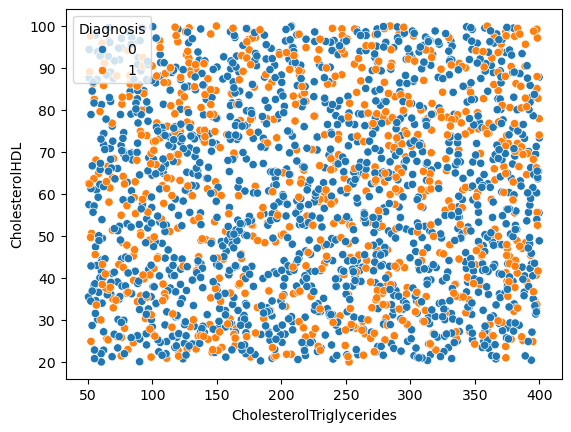

In [81]:
sns.scatterplot(df, x = 'CholesterolTriglycerides', y = 'CholesterolHDL', hue = 'Diagnosis' )

<Axes: xlabel='Age', ylabel='CholesterolTotal'>

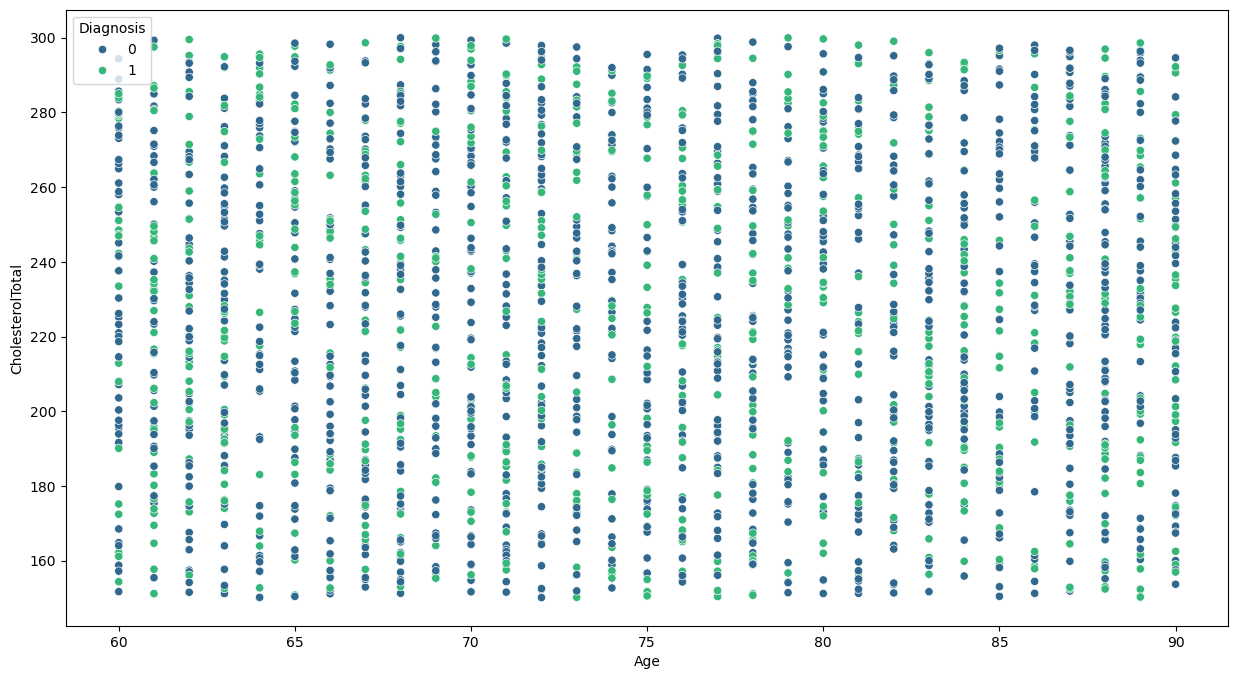

In [83]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=df, x='Age', y='CholesterolTotal', hue='Diagnosis', palette='viridis')

<Axes: xlabel='ADL', ylabel='Count'>

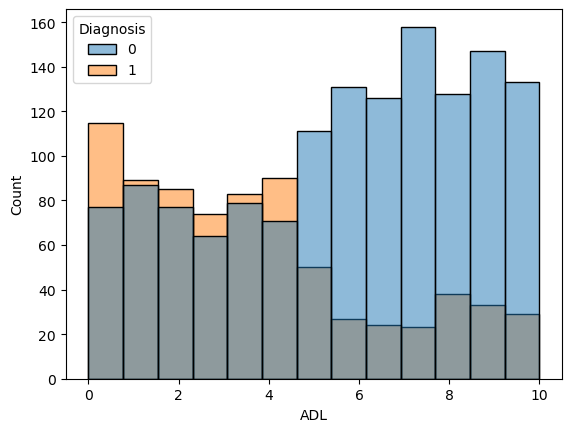

In [85]:
sns.histplot(df, x = 'ADL', hue = 'Diagnosis') #Activities of Daily Living score is low then chance of alzhemier is possible

df.drop(['PatientID', 'DoctorInCharge'] , axis = 1, inplace = True)
df.head()    #Deleted Unwanted Columns

In [53]:
df.shape

(2149, 33)